## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### MSE Threshold and Mean Coeff Values 

1. Fetch MSE threshold for training the ABC-GAN 
2. The ABC-GAN will be trained until the threshold MSE is achieved or until it completes 5000 epochs 
3. The threshold mse is the mean mse of Catboost over 10 runs

In [9]:
books = sb.read_notebooks('./BaseLine_Model_Output')
catboostMSE = []
for nb in books.notebooks: 
    catboostMSE.append(nb.scraps['Catboost MSE'].data)
    
#Threshold MSE     
threshold_mse = mean(catboostMSE)

print(threshold_mse)

0.10094117185431159


# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [10]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.034573
0:	learn: 0.9806058	total: 58.5ms	remaining: 58.4s
1:	learn: 0.9606716	total: 59.6ms	remaining: 29.8s
2:	learn: 0.9390920	total: 60.7ms	remaining: 20.2s
3:	learn: 0.9209237	total: 61.7ms	remaining: 15.4s
4:	learn: 0.9046978	total: 62.6ms	remaining: 12.5s
5:	learn: 0.8896854	total: 63.5ms	remaining: 10.5s
6:	learn: 0.8724151	total: 64.4ms	remaining: 9.13s
7:	learn: 0.8558633	total: 65.3ms	remaining: 8.1s
8:	learn: 0.8400199	total: 66.1ms	remaining: 7.28s
9:	learn: 0.8229065	total: 66.9ms	remaining: 6.62s
10:	learn: 0.8057776	total: 67.7ms	remaining: 6.09s
11:	learn: 0.7907426	total: 68.4ms	remaining: 5.63s
12:	learn: 0.7753485	total: 69.2ms	remaining: 5.26s
13:	learn: 0.7601130	total: 69.9ms	remaining: 4.93s
14:	learn: 0.7475256	total: 70.8ms	remaining: 4.65s
15:	learn: 0.7326054	total: 71.8ms	remaining: 4.42s
16:	learn: 0.7206853	total: 72.7ms	remaining: 4.2s
17:	learn: 0.7077303	total: 73.7ms	remaining: 4.02s
18:	learn: 0.6955287	total: 74.4ms	remaining: 

101:	learn: 0.3059717	total: 149ms	remaining: 1.31s
102:	learn: 0.3044976	total: 150ms	remaining: 1.3s
103:	learn: 0.3030824	total: 151ms	remaining: 1.3s
104:	learn: 0.3013455	total: 152ms	remaining: 1.29s
105:	learn: 0.2996238	total: 152ms	remaining: 1.28s
106:	learn: 0.2980370	total: 153ms	remaining: 1.28s
107:	learn: 0.2965967	total: 154ms	remaining: 1.27s
108:	learn: 0.2951864	total: 155ms	remaining: 1.26s
109:	learn: 0.2942861	total: 156ms	remaining: 1.26s
110:	learn: 0.2932928	total: 157ms	remaining: 1.25s
111:	learn: 0.2916150	total: 158ms	remaining: 1.25s
112:	learn: 0.2903158	total: 159ms	remaining: 1.25s
113:	learn: 0.2893044	total: 160ms	remaining: 1.24s
114:	learn: 0.2880453	total: 161ms	remaining: 1.24s
115:	learn: 0.2868924	total: 161ms	remaining: 1.23s
116:	learn: 0.2854905	total: 162ms	remaining: 1.22s
117:	learn: 0.2838426	total: 163ms	remaining: 1.22s
118:	learn: 0.2827228	total: 164ms	remaining: 1.21s
119:	learn: 0.2820207	total: 165ms	remaining: 1.21s
120:	learn: 0.

150:	learn: 0.2527124	total: 192ms	remaining: 1.08s
151:	learn: 0.2520669	total: 193ms	remaining: 1.08s
152:	learn: 0.2511829	total: 194ms	remaining: 1.07s
153:	learn: 0.2507161	total: 195ms	remaining: 1.07s
154:	learn: 0.2497802	total: 196ms	remaining: 1.07s
155:	learn: 0.2490613	total: 196ms	remaining: 1.06s
156:	learn: 0.2484356	total: 197ms	remaining: 1.06s
157:	learn: 0.2475208	total: 198ms	remaining: 1.05s
158:	learn: 0.2467460	total: 199ms	remaining: 1.05s
159:	learn: 0.2461317	total: 200ms	remaining: 1.05s
160:	learn: 0.2456028	total: 201ms	remaining: 1.05s
161:	learn: 0.2449256	total: 202ms	remaining: 1.04s
162:	learn: 0.2444113	total: 202ms	remaining: 1.04s
163:	learn: 0.2438126	total: 203ms	remaining: 1.04s
164:	learn: 0.2432080	total: 204ms	remaining: 1.03s
165:	learn: 0.2425986	total: 206ms	remaining: 1.03s
166:	learn: 0.2421108	total: 207ms	remaining: 1.03s
167:	learn: 0.2413956	total: 208ms	remaining: 1.03s
168:	learn: 0.2407630	total: 208ms	remaining: 1.02s
169:	learn: 

318:	learn: 0.1709797	total: 340ms	remaining: 725ms
319:	learn: 0.1706233	total: 341ms	remaining: 724ms
320:	learn: 0.1703284	total: 341ms	remaining: 722ms
321:	learn: 0.1700544	total: 342ms	remaining: 721ms
322:	learn: 0.1696955	total: 343ms	remaining: 719ms
323:	learn: 0.1695203	total: 344ms	remaining: 717ms
324:	learn: 0.1693707	total: 345ms	remaining: 716ms
325:	learn: 0.1690932	total: 346ms	remaining: 715ms
326:	learn: 0.1687871	total: 347ms	remaining: 713ms
327:	learn: 0.1684932	total: 347ms	remaining: 712ms
328:	learn: 0.1680740	total: 348ms	remaining: 710ms
329:	learn: 0.1676495	total: 349ms	remaining: 709ms
330:	learn: 0.1672606	total: 350ms	remaining: 707ms
331:	learn: 0.1669891	total: 351ms	remaining: 706ms
332:	learn: 0.1666284	total: 352ms	remaining: 705ms
333:	learn: 0.1664670	total: 353ms	remaining: 703ms
334:	learn: 0.1660441	total: 353ms	remaining: 702ms
335:	learn: 0.1657088	total: 354ms	remaining: 700ms
336:	learn: 0.1653987	total: 355ms	remaining: 698ms
337:	learn: 

367:	learn: 0.1573862	total: 383ms	remaining: 658ms
368:	learn: 0.1572274	total: 384ms	remaining: 657ms
369:	learn: 0.1568606	total: 385ms	remaining: 655ms
370:	learn: 0.1564609	total: 386ms	remaining: 654ms
371:	learn: 0.1560608	total: 387ms	remaining: 653ms
372:	learn: 0.1558547	total: 387ms	remaining: 651ms
373:	learn: 0.1555605	total: 388ms	remaining: 650ms
374:	learn: 0.1552292	total: 389ms	remaining: 648ms
375:	learn: 0.1549435	total: 390ms	remaining: 647ms
376:	learn: 0.1546544	total: 391ms	remaining: 646ms
377:	learn: 0.1543066	total: 391ms	remaining: 644ms
378:	learn: 0.1540311	total: 392ms	remaining: 643ms
379:	learn: 0.1536233	total: 393ms	remaining: 641ms
380:	learn: 0.1533239	total: 394ms	remaining: 640ms
381:	learn: 0.1530299	total: 395ms	remaining: 639ms
382:	learn: 0.1528336	total: 396ms	remaining: 637ms
383:	learn: 0.1526162	total: 397ms	remaining: 636ms
384:	learn: 0.1523426	total: 398ms	remaining: 635ms
385:	learn: 0.1521042	total: 398ms	remaining: 634ms
386:	learn: 

504:	learn: 0.1272349	total: 513ms	remaining: 503ms
505:	learn: 0.1271260	total: 515ms	remaining: 502ms
506:	learn: 0.1270468	total: 516ms	remaining: 502ms
507:	learn: 0.1268447	total: 517ms	remaining: 500ms
508:	learn: 0.1266565	total: 518ms	remaining: 500ms
509:	learn: 0.1265379	total: 519ms	remaining: 499ms
510:	learn: 0.1264936	total: 520ms	remaining: 498ms
511:	learn: 0.1263041	total: 521ms	remaining: 496ms
512:	learn: 0.1260636	total: 522ms	remaining: 495ms
513:	learn: 0.1257801	total: 523ms	remaining: 494ms
514:	learn: 0.1254765	total: 523ms	remaining: 493ms
515:	learn: 0.1254352	total: 524ms	remaining: 492ms
516:	learn: 0.1252340	total: 525ms	remaining: 490ms
517:	learn: 0.1252031	total: 526ms	remaining: 489ms
518:	learn: 0.1250256	total: 527ms	remaining: 488ms
519:	learn: 0.1247722	total: 528ms	remaining: 487ms
520:	learn: 0.1245918	total: 530ms	remaining: 488ms
521:	learn: 0.1243609	total: 531ms	remaining: 487ms
522:	learn: 0.1243283	total: 532ms	remaining: 486ms
523:	learn: 

546:	learn: 0.1205887	total: 555ms	remaining: 460ms
547:	learn: 0.1203470	total: 557ms	remaining: 459ms
548:	learn: 0.1201638	total: 558ms	remaining: 458ms
549:	learn: 0.1200067	total: 559ms	remaining: 457ms
550:	learn: 0.1198272	total: 560ms	remaining: 456ms
551:	learn: 0.1195666	total: 562ms	remaining: 456ms
552:	learn: 0.1194183	total: 563ms	remaining: 455ms
553:	learn: 0.1191881	total: 564ms	remaining: 454ms
554:	learn: 0.1189026	total: 565ms	remaining: 453ms
555:	learn: 0.1187021	total: 566ms	remaining: 452ms
556:	learn: 0.1185118	total: 567ms	remaining: 451ms
557:	learn: 0.1183468	total: 568ms	remaining: 450ms
558:	learn: 0.1181768	total: 569ms	remaining: 449ms
559:	learn: 0.1179853	total: 570ms	remaining: 448ms
560:	learn: 0.1177859	total: 571ms	remaining: 447ms
561:	learn: 0.1175936	total: 572ms	remaining: 446ms
562:	learn: 0.1174509	total: 573ms	remaining: 445ms
563:	learn: 0.1172948	total: 574ms	remaining: 444ms
564:	learn: 0.1171456	total: 575ms	remaining: 443ms
565:	learn: 

684:	learn: 0.0988174	total: 686ms	remaining: 316ms
685:	learn: 0.0987647	total: 688ms	remaining: 315ms
686:	learn: 0.0986617	total: 689ms	remaining: 314ms
687:	learn: 0.0985320	total: 690ms	remaining: 313ms
688:	learn: 0.0983583	total: 690ms	remaining: 312ms
689:	learn: 0.0983409	total: 691ms	remaining: 311ms
690:	learn: 0.0982958	total: 692ms	remaining: 310ms
691:	learn: 0.0982008	total: 693ms	remaining: 308ms
692:	learn: 0.0980242	total: 694ms	remaining: 307ms
693:	learn: 0.0978562	total: 695ms	remaining: 306ms
694:	learn: 0.0978074	total: 696ms	remaining: 305ms
695:	learn: 0.0977009	total: 697ms	remaining: 304ms
696:	learn: 0.0975536	total: 697ms	remaining: 303ms
697:	learn: 0.0974148	total: 698ms	remaining: 302ms
698:	learn: 0.0973816	total: 699ms	remaining: 301ms
699:	learn: 0.0973531	total: 700ms	remaining: 300ms
700:	learn: 0.0972431	total: 701ms	remaining: 299ms
701:	learn: 0.0970350	total: 702ms	remaining: 298ms
702:	learn: 0.0969911	total: 703ms	remaining: 297ms
703:	learn: 

732:	learn: 0.0934570	total: 730ms	remaining: 266ms
733:	learn: 0.0933055	total: 731ms	remaining: 265ms
734:	learn: 0.0932174	total: 732ms	remaining: 264ms
735:	learn: 0.0930800	total: 733ms	remaining: 263ms
736:	learn: 0.0929764	total: 733ms	remaining: 262ms
737:	learn: 0.0928240	total: 735ms	remaining: 261ms
738:	learn: 0.0927183	total: 736ms	remaining: 260ms
739:	learn: 0.0925957	total: 737ms	remaining: 259ms
740:	learn: 0.0925025	total: 738ms	remaining: 258ms
741:	learn: 0.0923401	total: 739ms	remaining: 257ms
742:	learn: 0.0923163	total: 740ms	remaining: 256ms
743:	learn: 0.0921469	total: 741ms	remaining: 255ms
744:	learn: 0.0920264	total: 742ms	remaining: 254ms
745:	learn: 0.0918709	total: 743ms	remaining: 253ms
746:	learn: 0.0917286	total: 744ms	remaining: 252ms
747:	learn: 0.0916813	total: 745ms	remaining: 251ms
748:	learn: 0.0915730	total: 746ms	remaining: 250ms
749:	learn: 0.0915436	total: 747ms	remaining: 249ms
750:	learn: 0.0914450	total: 749ms	remaining: 248ms
751:	learn: 

890:	learn: 0.0772587	total: 875ms	remaining: 107ms
891:	learn: 0.0771885	total: 876ms	remaining: 106ms
892:	learn: 0.0770842	total: 877ms	remaining: 105ms
893:	learn: 0.0770361	total: 878ms	remaining: 104ms
894:	learn: 0.0769862	total: 879ms	remaining: 103ms
895:	learn: 0.0768714	total: 880ms	remaining: 102ms
896:	learn: 0.0768206	total: 881ms	remaining: 101ms
897:	learn: 0.0768096	total: 882ms	remaining: 100ms
898:	learn: 0.0766848	total: 883ms	remaining: 99.2ms
899:	learn: 0.0766545	total: 884ms	remaining: 98.2ms
900:	learn: 0.0766092	total: 884ms	remaining: 97.2ms
901:	learn: 0.0765289	total: 885ms	remaining: 96.2ms
902:	learn: 0.0764690	total: 886ms	remaining: 95.2ms
903:	learn: 0.0763226	total: 887ms	remaining: 94.2ms
904:	learn: 0.0762425	total: 888ms	remaining: 93.2ms
905:	learn: 0.0761494	total: 888ms	remaining: 92.2ms
906:	learn: 0.0760610	total: 889ms	remaining: 91.2ms
907:	learn: 0.0760024	total: 890ms	remaining: 90.2ms
908:	learn: 0.0759044	total: 892ms	remaining: 89.3ms
9

938:	learn: 0.0733648	total: 918ms	remaining: 59.7ms
939:	learn: 0.0732843	total: 919ms	remaining: 58.7ms
940:	learn: 0.0732315	total: 920ms	remaining: 57.7ms
941:	learn: 0.0731403	total: 921ms	remaining: 56.7ms
942:	learn: 0.0730199	total: 922ms	remaining: 55.7ms
943:	learn: 0.0729180	total: 923ms	remaining: 54.7ms
944:	learn: 0.0728465	total: 924ms	remaining: 53.8ms
945:	learn: 0.0728162	total: 925ms	remaining: 52.8ms
946:	learn: 0.0726765	total: 926ms	remaining: 51.8ms
947:	learn: 0.0726307	total: 926ms	remaining: 50.8ms
948:	learn: 0.0725315	total: 927ms	remaining: 49.8ms
949:	learn: 0.0724728	total: 928ms	remaining: 48.9ms
950:	learn: 0.0723660	total: 929ms	remaining: 47.9ms
951:	learn: 0.0722875	total: 930ms	remaining: 46.9ms
952:	learn: 0.0721778	total: 931ms	remaining: 45.9ms
953:	learn: 0.0721051	total: 932ms	remaining: 44.9ms
954:	learn: 0.0719889	total: 933ms	remaining: 44ms
955:	learn: 0.0719137	total: 934ms	remaining: 43ms
956:	learn: 0.0718347	total: 935ms	remaining: 42ms

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.11066747663669782


#### Sanity Checks 

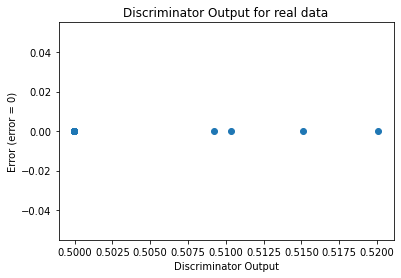

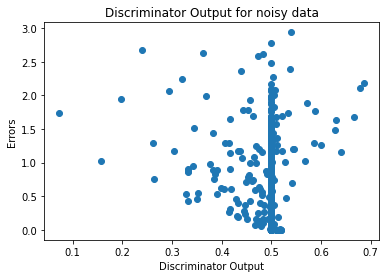

In [14]:
sanityChecks.discProbVsError(real_dataset,disc,device)

**Training ABC-GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [15]:
gen2 = network.Generator(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [16]:
discLossA2,genLossA2 = ABC_train_test2.training_GAN_2(disc2,gen2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_2 Generator Loss",genLossA2)
sb.glue("ABC_GAN_2 Discriminator Loss",discLossA2)

Number of epochs 55


In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,"2",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MSE")
print(mean(ABC_GAN2_metrics[0]))

MSE
0.08600337334846672


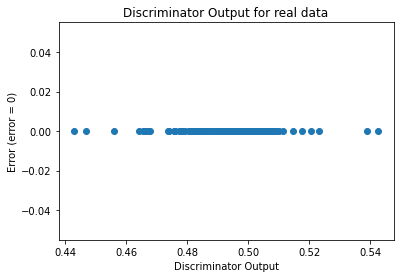

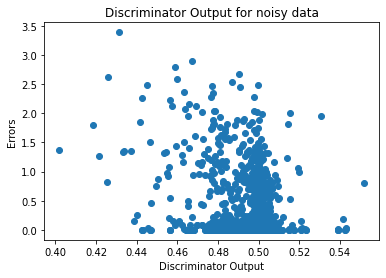

In [18]:
sanityChecks.discProbVsError(real_dataset,disc2,device)

# ABC - GAN Model with skip connection

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.005384257029380404


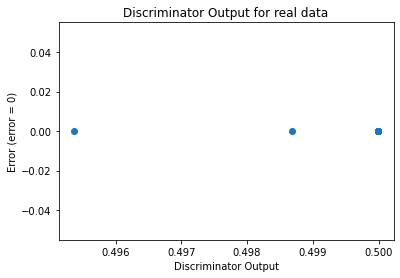

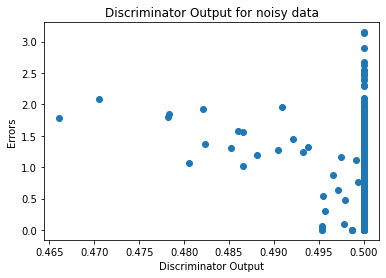

In [22]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [23]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0062]], requires_grad=True)
